# Desafio 2 - AceleraDev Data Science

__Conhecendo melhor nossa base de consumidores: qual estado possui os clientes com melhores pontuações de crédito?__

## Apresentação

Queremos conhecer melhor nossos clientes por estado. Para isso, iniciamos uma análise na pontuação de crédito. Para realizar a verificação inicial, precisamos de alguns valores. Os valores são a média, a mediana, a moda e o desvio padrão da pontuação de crédito.

### Detalhes

A resposta deve conter os valores da média, mediana, moda e desvio padrão da pontuação de crédito para cada estado do dataset. O arquivo para submissão deve estar em formato json, conforme o arquivo exemplo “submission.json”.

In [1]:
open("submission.json").read()

'{"SC":{"moda":850.0,"mediana":653.0,"media":649.5376527423,"desvio_padrao":97.2334927934},"RS":{"moda":850.0,"mediana":650.0,"media":651.1051428571,"desvio_padrao":95.1365984138},"PR":{"moda":850.0,"mediana":650.0,"media":648.9612940497,"desvio_padrao":98.6071859131}}'

## Configuração do ambiente

### Importar libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

### Carregar dados

In [3]:
df = pd.read_csv("desafio1.csv", index_col=0).reset_index(drop=True)

### Outras configurações

In [4]:
sbn.set()

## Descrição dos dados

|Nome|Descrição|
|----|---------|
|`id`| Identificador do cliente|
|`sobrenome`| Sobrenome do cliente|
|`pontuacao_credito`| Pontuação de crédito do cliente (quanto maior, melhor o cliente geralmente)|
|`estado_residencia`| Estado de residência do cliente|
|`genero`| Gênero do cliente|
|`nivel_estabilidade`| Nível de estabilidade do cliente|
|`saldo_conta`| Saldo disponível na conta do cliente|
|`numero_produtos`| Número de produtos que o cliente consome|
|`possui_cartao_de_credito`| Possui um cartão de crédito cadastrado|
|`membro_ativo`| Membro acessa e consome frequentemente|


In [5]:
df.shape

(7000, 11)

In [6]:
df.dtypes

id                           object
sobrenome                    object
pontuacao_credito             int64
estado_residencia            object
genero                       object
idade                         int64
nivel_estabilidade            int64
saldo_conta                 float64
numero_produtos               int64
possui_cartao_de_credito      int64
membro_ativo                  int64
dtype: object

In [7]:
df["id"].nunique()

7000

É um _data set_ com 7000 observações, cada uma representando um cliente e identificado pelo código da variável `id`. A respeito deles há um conjunto de 11 variáveis, sendo 4 categóricas e as demais numéricas. Não há presença de valores `null` em nenhuma coluna, então posso partir direto para a análise.

In [8]:
df.describe()

,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


* A pontuação de crédito aparentemente tem distribuição homogênea, com intervalo de 350 a 850 e média 649.78

* A idade dos clientes da base está centrada entre 32 e 44 anos de idade, de modo que tratam-se em sua maioriade pessoas adultas nascidas entre os anos 1970 e 1980.

* O nível de estabilidade também aparenta ter distribuição aproximadamente normal

* O quantidade de produtos adquiridos é de no máximo quatro, mas o mais comum é a compra de um ou dois itens

* 70% dos clientes possuem cartão de crédito

## Resolução do exercício 

Vou começar resolvendo o desafio. O objetivo é conhecer melhor os clientes e identificar onde estão os mais "confiáveis". Para tal, o resultado deverá conter a média, a mediana, a moda e o desvio padrão da pontuação de crédito de cada estado.

In [9]:
# calcular estatísticas
moda = df.groupby('estado_residencia')["pontuacao_credito"].apply(lambda x: x.mode())
moda = moda.reset_index(drop=False).set_index("estado_residencia").iloc[:, 1]
mediana = df.groupby("estado_residencia")["pontuacao_credito"].quantile()
media = df.groupby("estado_residencia")["pontuacao_credito"].mean()
dp = df.groupby("estado_residencia")["pontuacao_credito"].std()

# juntar num data frame
resultados = pd.DataFrame({"moda": moda,
                           "mediana": mediana,
                           "media": media,
                           "desvio_padrao": dp}).sort_index(ascending=False).T
# resultados = pd.DataFrame(resultados)
resultados

estado_residencia,SC,RS,PR
moda,850.000000,850.000000,850.000000
mediana,653.000000,650.000000,650.000000
media,649.537653,651.105143,648.961294
desvio_padrao,97.233493,95.136598,98.607186


In [10]:
# exportar para json
resultados.to_json("submission.json")

## Análise exploratória

Agora que a missão está cumprida, é hora de brincar um pouco com os dados e ver o que podemos aprender sobre esse conjunto de consumidores da região Sul do Brasil.

Focarei na análise de três questões:

1. __Como é a relação do saldo com o score? As pessoas com mais dinheiro em conta são melhor pagadoras? O que o nível de estabilidade pode dizer em relação a isso?__
    
    Espera-se que pessoas de maior nível econômico sejam menos propensas a atrasar contas e, como tal, tenham uma maior _score_ de crédito, assim como que em geral ele seja mais estável entre pessoas com esse perfil. Os dados confirmam isso?

2. __As pessoas mais jovens são menos responsáveis que as pessoas mais velhas em termos de quitação de débitos?__

    Seria natual esperar que pessoas mais maduras sejam financeiramente mais estáveis e, portanto, tenham maior capacidade de pagar as contas em dia. Além disso, é normal considerar que a responsabilidade financeira vêm com a idade. Os dados fornecem evidências de que isso seja verdade?

3. __Pode-se que dizer que há diferença no perfil de consumo dos clientes conforme o score?__

    Particularmente, o número de itens comprados está associado ao _score_ dos clientes? Se sim, essa associação varia em função da idade ou do gênero?

### Análise univariada

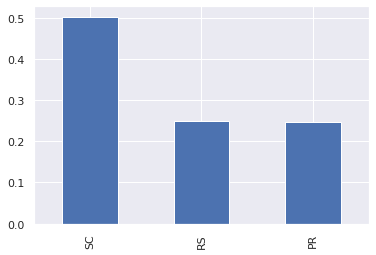

In [11]:
df["estado_residencia"].value_counts(normalize=1).plot.bar();

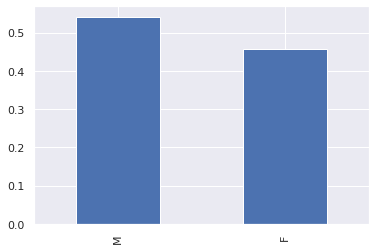

In [12]:
df["genero"].value_counts(normalize=1).plot.bar();

Os consumidores da base de dados residem todos na região Sul do Brasil. A metade deles é de Santa Catarina (SC) e os outros dois quartos estão divididos entre Paraná (PR) e Rio Grande do Sul (RS).

Além disso, é interessante conhecer também a distribuição da pontuação de crédito.

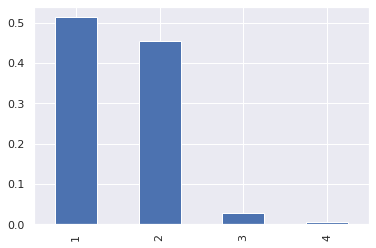

In [13]:
df["numero_produtos"].value_counts(normalize=1).plot.bar();

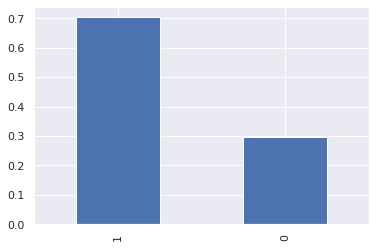

In [14]:
df["possui_cartao_de_credito"].value_counts(normalize=1).plot.bar();

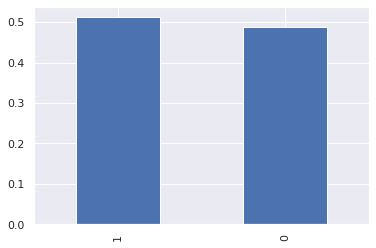

In [15]:
df["membro_ativo"].value_counts(normalize=1).plot.bar();

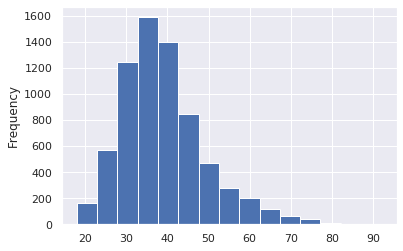

In [16]:
df["idade"].plot.hist(bins=15)

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

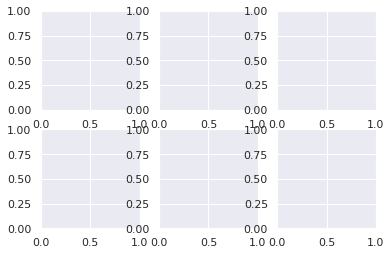

In [34]:
col_num = df.select_dtypes("float64", "int64")

fig, axes = plt.subplots(2, 3)

for i, n in zip(col_num, range(1, len(col_num) + 1)):
    df[i].plot.hist(ax=axes[n])
    axes[n].title(i)
    plt.show()

Trata-se de uma distribuição levemente assimétrica à esquerda. Observa-se uma concentração de consumidores com pontuação próximo de 850 que quebra a forma da distribuição na faixa de _scores_ mais elevados, gerando um modal diferente do restante da distribuição. Isto pode sugerir que algo em torno de 850 é a pontuação máxima que se pode chegar, ou que trata-se de um limiar difícil de ser superado.

Agora eu vou calcular a estatísticas requeridas:

In [13]:
(df["pontuacao_credito"] > df["pontuacao_credito"].mean()).value_counts()

True     3551
False    3449
Name: pontuacao_credito, dtype: int64